## Assignment-03 First Step of Machine Learning: Model and Evaluation

同学们，今天我们的学习了基本的机器学习概念，相比你已经对机器学习的这些方法有一个基本的认识了。值得说明的是，机器学习不仅仅是一系列方法，更重要的是一种思维体系，即：依据以往的、现有的数据，构建某种方法来解决未见过的问题。而且决策树，贝叶斯只是实现这个目标的一个方法，包括之后的神经网络。很有可能有一天，神经网络也会被淘汰，但是重要的是我们要理解机器学习的目标，就是尽可能的自动化解决未知的问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1571556399207&di=4a97dc15ad08dd49d3748d1edf6109b3&imgtype=0&src=http%3A%2F%2Fc.hiphotos.baidu.com%2Fzhidao%2Fwh%3D450%2C600%2Fsign%3Dae742c6aedcd7b89e93932873a146e91%2F5d6034a85edf8db1b16050c40223dd54574e74c7.jpg)

# Part-1 Programming Review 编程回顾

# 1. Re-code the Linear-Regression Model using scikit-learning(10 points)

<评阅点>： 
> + 是否完成线性回归模型 (4')
+ 能够进行预测新数据(3')
+ 能够进行可视化操作(3')

## 1.1 输入数据，标签数据随机生成

In [1]:
# you code here
%matplotlib inline

In [3]:
import numpy as np

In [4]:
random_data = np.random.random((20, 2))

In [5]:
random_data

array([[0.8662369 , 0.8565669 ],
       [0.96389841, 0.665614  ],
       [0.25552968, 0.73575064],
       [0.19287037, 0.18688624],
       [0.79118239, 0.10071363],
       [0.86695606, 0.3405539 ],
       [0.96607909, 0.60381636],
       [0.79276952, 0.86490657],
       [0.02632913, 0.08236626],
       [0.7640365 , 0.00154634],
       [0.00919732, 0.06703663],
       [0.84481608, 0.40042929],
       [0.48693136, 0.65718149],
       [0.01691653, 0.64031332],
       [0.38285448, 0.41750137],
       [0.47650578, 0.24455777],
       [0.15712659, 0.081945  ],
       [0.71681367, 0.49158336],
       [0.40674058, 0.02738279],
       [0.78255733, 0.91000144]])

In [6]:
import matplotlib.pyplot as plt

In [8]:
# 取每个列表中的第一个值，作为输入
x = random_data[:,0]

In [10]:
x

array([0.8662369 , 0.96389841, 0.25552968, 0.19287037, 0.79118239,
       0.86695606, 0.96607909, 0.79276952, 0.02632913, 0.7640365 ,
       0.00919732, 0.84481608, 0.48693136, 0.01691653, 0.38285448,
       0.47650578, 0.15712659, 0.71681367, 0.40674058, 0.78255733])

In [11]:
# 取每个元素的第二个值，作为标签
y = random_data[:,1]

In [12]:
y

array([0.8565669 , 0.665614  , 0.73575064, 0.18688624, 0.10071363,
       0.3405539 , 0.60381636, 0.86490657, 0.08236626, 0.00154634,
       0.06703663, 0.40042929, 0.65718149, 0.64031332, 0.41750137,
       0.24455777, 0.081945  , 0.49158336, 0.02738279, 0.91000144])

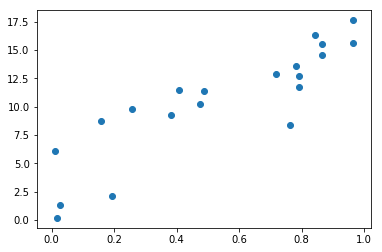

In [52]:
plt.scatter(x, y)

## 1.2 假设函数定义

In [13]:
import random

In [25]:
# 定义假设函数,随便定义一个假设函数，生成y
def assuming_func(x, k, b):
    return k*x + b + random.randint(-4, 4)

In [32]:
y_ = [assuming_func(x_, 11, 4) for x_ in x]

In [33]:
y_

[13.528605899765578,
 16.60288250212927,
 5.810826526462586,
 6.121574105745322,
 16.70300630121816,
 11.53651667370438,
 11.626870019954795,
 11.720464713400862,
 3.2896204242629192,
 8.404401509133361,
 8.101170543861361,
 17.29297690946655,
 10.356244937457042,
 2.1860818440374317,
 4.211399313016258,
 8.241563568405951,
 8.728392482234497,
 14.884950336987426,
 5.4741463851764784,
 8.608130658800663]

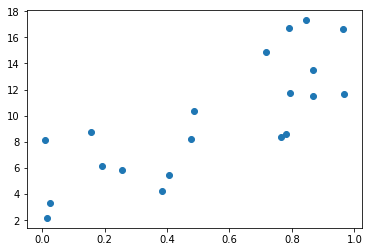

In [34]:
plt.scatter(x, y_)

### *
为什么要用numpy

    Python中提供了list容器，可以当作数组使用。但列表中的元素可以是任何对象，因此列表中保存的是对象的指针，这样一来，为了保存一个简单的列表[1,2,3]。就需要三个指针和三个整数对象。对于数值运算来说，这种结构显然不够高效。
    Python虽然也提供了array模块，但其只支持一维数组，不支持多维数组(在TensorFlow里面偏向于矩阵理解)，也没有各种运算函数。因而不适合数值运算。
    NumPy的出现弥补了这些不足。

（——摘自张若愚的《Python科学计算》）
————————————————
版权声明：本文为CSDN博主「furuit」的原创文章，遵循 CC 4.0 BY-SA 版权协议，转载请附上原文出处链接及本声明。
原文链接：https://blog.csdn.net/fu6543210/article/details/83240024

In [36]:
y_ = np.array(y_)

In [37]:
y_

array([13.5286059 , 16.6028825 ,  5.81082653,  6.12157411, 16.7030063 ,
       11.53651667, 11.62687002, 11.72046471,  3.28962042,  8.40440151,
        8.10117054, 17.29297691, 10.35624494,  2.18608184,  4.21139931,
        8.24156357,  8.72839248, 14.88495034,  5.47414639,  8.60813066])

## 1.3 调用线性模型

In [31]:
from sklearn.linear_model import LinearRegression

In [41]:
x

array([0.8662369 , 0.96389841, 0.25552968, 0.19287037, 0.79118239,
       0.86695606, 0.96607909, 0.79276952, 0.02632913, 0.7640365 ,
       0.00919732, 0.84481608, 0.48693136, 0.01691653, 0.38285448,
       0.47650578, 0.15712659, 0.71681367, 0.40674058, 0.78255733])

### reshape(-1, 1)
列数变成1，行数自动计算

In [40]:
x.reshape(-1, 1)

array([[0.8662369 ],
       [0.96389841],
       [0.25552968],
       [0.19287037],
       [0.79118239],
       [0.86695606],
       [0.96607909],
       [0.79276952],
       [0.02632913],
       [0.7640365 ],
       [0.00919732],
       [0.84481608],
       [0.48693136],
       [0.01691653],
       [0.38285448],
       [0.47650578],
       [0.15712659],
       [0.71681367],
       [0.40674058],
       [0.78255733]])

In [53]:
# 输入数据，标签，训练模型
model = LinearRegression().fit(x.reshape(-1, 1), y_)

In [54]:
#线性回归的scroe方法得到的是决定系数R平方
#评估模型:决定系数R平方
model.score(x.reshape(-1, 1), y_)

0.6214568099872274

In [55]:
# 回归系数
a = model.coef_

In [56]:
# 截距
b = model.intercept_

In [57]:
# 获得线性函数
def f(x):
    return a*x + b

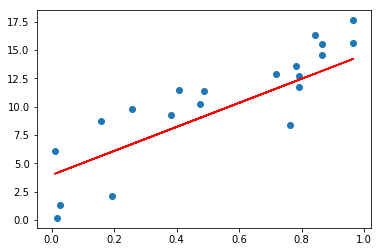

In [58]:
plt.scatter(x, y)
plt.plot(x, f(x), color='red')

## 1.4 模型预测

In [60]:
y_train_pred = model.predict(x.reshape(-1, 1))

In [ ]:
# 训练值-预测值，可视化图

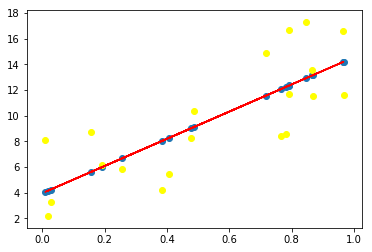

In [67]:
plt.scatter(x.reshape(-1, 1), y_train_pred)
plt.scatter(x.reshape(-1, 1), y_, color='yellow')
plt.plot(x, f(x), color='red')

# 2. Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem. (8 points)

<评阅点>:
> + 是否完成了KNN模型 (4')
+ 是否能够预测新的数据 (4')

### 算法描述
1）计算测试数据与各个训练数据之间的距离；

2）按照距离的递增关系进行排序；

3）选取距离最小的K个点；

4）确定前K个点所在类别的出现频率；

5）返回前K个点中出现频率最高的类别作为测试数据的预测分类。

In [68]:
def model(x, y):
    return [(xi, yi) for xi, yi in zip(x, y)]

In [69]:
model(x,y)

[(0.8662368999786889, 15.528605899765578),
 (0.9638984092844792, 17.60288250212927),
 (0.25552968422387146, 9.810826526462586),
 (0.19287037324957468, 2.1215741057453217),
 (0.7911823910198326, 11.703006301218158),
 (0.8669560612458527, 14.53651667370438),
 (0.9660790927231632, 15.626870019954795),
 (0.7927695194000783, 12.720464713400862),
 (0.026329129478447233, 1.2896204242629192),
 (0.7640365008303055, 8.404401509133361),
 (0.00919732216921465, 6.101170543861361),
 (0.8448160826787772, 16.29297690946655),
 (0.48693135795064013, 11.356244937457042),
 (0.01691653127613013, 0.18608184403743167),
 (0.38285448300147795, 9.211399313016258),
 (0.47650577894599544, 10.241563568405951),
 (0.15712658929404522, 8.728392482234497),
 (0.7168136669988568, 12.884950336987426),
 (0.4067405804705889, 11.474146385176478),
 (0.7825573326182421, 13.608130658800663)]

In [70]:
# 计算一维数组之间的余弦距离
from scipy.spatial.distance import cosine

In [72]:
def distance(x1, x2):
    return cosine(x1, x2)

In [82]:
def predict(x_, k=6):
    most_simiars = sorted(model(x, y), key=lambda xi: distance(xi[0], x_))[:k]
    print(most_simiars)
    y_hats = [_y for x, _y in most_simiars]
    return np.mean(y_hats)

### 预测新数据

In [84]:
predict(0.8)

[(0.8662368999786889, 15.528605899765578), (0.9638984092844792, 17.60288250212927), (0.25552968422387146, 9.810826526462586), (0.19287037324957468, 2.1215741057453217), (0.7911823910198326, 11.703006301218158), (0.9660790927231632, 15.626870019954795)]


12.06562755921262

# 3. Re-code the Decision Tree, which could sort the features by salience. (12 points)

<评阅点>
> + 是否实现了信息熵 (1' )
+ 是否实现了最优先特征点的选择(5')
+ 是否实现了持续的特征选则(6')

## 3.1 信息熵

In [85]:
from collections import Counter

In [87]:
!pip install icecream

  Stored in directory: /Users/stone/Library/Caches/pip/wheels/b0/71/dc/c1bdcd4b384c4458b639dfa905bc093979b8779f2e0df78792
Successfully built executing


In [88]:
from icecream import ic

$$ Entropy = -\sum_i^n Pr(x_i)log(Pr(x_i)) $$

In [114]:
def entropy(elements_list):
    length = len(elements_list)
    counter = Counter(elements_list)
    probs = [counter[c] / length for c in set(elements_list)]
#     print(probs)
    ic(probs)
    # 不写底数时默认以e为底
    return -sum(p * np.log(p) for p in probs)

In [115]:
elements_list = [[1, 3, 4, 1], [1, 3, -4, 1], [1, 2, 2, 1], [1, 1, 1, 1]]

In [116]:
for e in elements_list:
    print(str(e),'==>', entropy(e))

ic| probs: [0.5, 0.25, 0.25]
ic| probs: [0.5, 0.25, 0.25]
ic| probs: [0.5, 0.5]
ic| probs: [1.0]


[1, 3, 4, 1] ==> 1.0397207708399179
[1, 3, -4, 1] ==> 1.0397207708399179
[1, 2, 2, 1] ==> 0.6931471805599453
[1, 1, 1, 1] ==> -0.0


## 3.2 决策树

In [117]:
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
   'pet': [1, 1, 1, 0, 0, 0, 1],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

In [118]:
import pandas as pd

In [119]:
dataset = pd.DataFrame.from_dict(mock_data)

In [120]:
dataset

,gender,income,family_number,pet,bought
0,F,+10,1,1,1
1,F,-10,1,1,1
2,F,+10,2,1,1
3,F,+10,1,0,0
4,M,+10,1,0,0
5,M,+10,1,0,0
6,M,-10,2,1,1


In [122]:
# split_by_gender: 
print("split_by_gender:",entropy([1, 1, 1, 0]) + entropy([0, 0, 1]))

# split_by_income:
print("split_by_income:",entropy([1, 1, 0, 0, 0]) + entropy([1, 1]))

# split_by_family_number
print("split_by_family_number",entropy([1, 1, 0, 0, 0]) + entropy([1, 1]))

# split_by_pet
print("split_by_pet:",entropy([1, 1, 1, 1]) + entropy([0, 0, 0]))

ic| probs: [0.25, 0.75]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| probs: [0.6, 0.4]
ic| probs: [1.0]
ic| probs: [0.6, 0.4]
ic| probs: [1.0]
ic| probs: [1.0]
ic| probs: [1.0]


split_by_gender: 1.198849312913621
split_by_income: 0.6730116670092565
split_by_family_number 0.6730116670092565
split_by_pet: -0.0


In [143]:
print(dataset['family_number'] == 1)

0     True
1     True
2    False
3     True
4     True
5     True
6    False
Name: family_number, dtype: bool


In [146]:
dataset['bought']

0    1
1    1
2    1
3    0
4    0
5    0
6    1
Name: bought, dtype: int64

In [140]:
sub_split_1 = dataset[dataset['family_number'] == 1]['bought'].tolist()

In [141]:
sub_split_1

[1, 1, 0, 0, 0]

In [127]:
splited_data = dataset[dataset['family_number'] == 1]

In [128]:
splited_data

,gender,income,family_number,pet,bought
0,F,+10,1,1,1
1,F,-10,1,1,1
3,F,+10,1,0,0
4,M,+10,1,0,0
5,M,+10,1,0,0


In [129]:
splited_data[splited_data['income'] == '+10']

,gender,income,family_number,pet,bought
0,F,+10,1,1,1
3,F,+10,1,0,0
4,M,+10,1,0,0
5,M,+10,1,0,0


In [149]:
def find_optimal_spilter(train_data: pd.DataFrame, target: str) -> str:
    # set(train_data.columns.tolist()): {'family_number', 'income', 'gender', 'pet', 'bought'}
    x_fields = set(train_data.columns.tolist()) - {target}
#     print(x_fields)
    spliter = None
    min_entropy = float('inf')
    for f in x_fields:
        """
        {'M', 'F'}
        {1, 2}
        {'-10', '+10'}
        {0, 1}
        """
        values = set(train_data[f])
        print(values)
        for v in values:
            sub_spliter_1 = train_data[train_data[f] == v][target].tolist()
            ic(sub_spliter_1)
            entropy_1 = entropy(sub_spliter_1)
            
            sub_spliter_2 = train_data[train_data[f] != v][target].tolist()
            ic(sub_spliter_2)
            entropy_2 = entropy(sub_spliter_2)
            
            entropy_v = entropy_1 + entropy_2
            ic(entropy_v)
            
            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f, v)
    print('spliter is: {}'.format(spliter))
    print('the min entropy is: {}'.format(min_entropy))
    
    return spliter     
        

In [150]:
find_optimal_spilter(train_data=dataset, target='bought')

ic| sub_spliter_1: [0, 0, 1]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| sub_spliter_2: [1, 1, 1, 0]
ic| probs: [0.25, 0.75]
ic| entropy_v: 1.198849312913621
ic| sub_spliter_1: [1, 1, 1, 0]
ic| probs: [0.25, 0.75]
ic| sub_spliter_2: [0, 0, 1]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| entropy_v: 1.198849312913621


{'M', 'F'}
{1, 2}


ic| sub_spliter_1: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| sub_spliter_2: [1, 1]
ic| probs: [1.0]
ic| entropy_v: 0.6730116670092565
ic| sub_spliter_1: [1, 1]
ic| probs: [1.0]
ic| sub_spliter_2: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_v: 0.6730116670092565
ic| sub_spliter_1: [1, 1]
ic| probs: [1.0]
ic| sub_spliter_2: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_v: 0.6730116670092565
ic| sub_spliter_1: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| sub_spliter_2: [1, 1]
ic| probs: [1.0]
ic| entropy_v: 0.6730116670092565
ic| sub_spliter_1: [0, 0, 0]
ic| probs: [1.0]


{'-10', '+10'}
{0, 1}


ic| sub_spliter_2: [1, 1, 1, 1]
ic| probs: [1.0]
ic| entropy_v: -0.0
ic| sub_spliter_1: [1, 1, 1, 1]
ic| probs: [1.0]
ic| sub_spliter_2: [0, 0, 0]
ic| probs: [1.0]
ic| entropy_v: -0.0


spliter is: ('pet', 1)
the min entropy is: -0.0


('pet', 1)

In [152]:
find_optimal_spilter(dataset[dataset['family_number'] == 1], 'bought')

ic| sub_spliter_1: [0, 0]
ic| probs: [1.0]
ic| sub_spliter_2: [1, 1, 0]
ic| probs: [0.3333333333333333, 0.6666666666666666]
ic| entropy_v: 0.6365141682948128
ic| sub_spliter_1: [1, 1, 0]
ic| probs: [0.3333333333333333, 0.6666666666666666]
ic| sub_spliter_2: [0, 0]
ic| probs: [1.0]
ic| entropy_v: 0.6365141682948128


{'M', 'F'}
{1}


ic| sub_spliter_1: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| sub_spliter_2: []
ic| probs: []
ic| entropy_v: 0.6730116670092565
ic| sub_spliter_1: [1]
ic| probs: [1.0]
ic| sub_spliter_2: [1, 0, 0, 0]
ic| probs: [0.75, 0.25]
ic| entropy_v: 0.5623351446188083
ic| sub_spliter_1: [1, 0, 0, 0]
ic| probs: [0.75, 0.25]
ic| sub_spliter_2: [1]
ic| probs: [1.0]
ic| entropy_v: 0.5623351446188083
ic| sub_spliter_1: [0, 0, 0]
ic| probs: 

{'-10', '+10'}
{0, 1}


[1.0]
ic| sub_spliter_2: [1, 1]
ic| probs: [1.0]
ic| entropy_v: -0.0
ic| sub_spliter_1: [1, 1]
ic| probs: [1.0]
ic| sub_spliter_2: [0, 0, 0]
ic| probs: [1.0]
ic| entropy_v: -0.0


spliter is: ('pet', 1)
the min entropy is: -0.0


('pet', 1)

In [153]:
fm_n_1 = dataset[dataset['family_number'] == 1]

In [155]:
fm_n_1

,gender,income,family_number,pet,bought
0,F,+10,1,1,1
1,F,-10,1,1,1
3,F,+10,1,0,0
4,M,+10,1,0,0
5,M,+10,1,0,0


In [156]:
fm_n_1[fm_n_1['income'] == '+10']

,gender,income,family_number,pet,bought
0,F,+10,1,1,1
3,F,+10,1,0,0
4,M,+10,1,0,0
5,M,+10,1,0,0


In [157]:
fm_n_1[fm_n_1['income'] != '+10']

,gender,income,family_number,pet,bought
1,F,-10,1,1,1


In [158]:
find_optimal_spilter(fm_n_1[fm_n_1['income'] == '+10'], 'bought')

ic| sub_spliter_1: [0, 0]
ic| probs: [1.0]
ic| sub_spliter_2: [1, 0]
ic| probs: [0.5, 0.5]
ic| entropy_v: 0.6931471805599453
ic| sub_spliter_1: [1, 0]
ic| probs: [0.5, 0.5]
ic| sub_spliter_2: [0, 0]
ic| probs: [1.0]
ic| entropy_v: 0.6931471805599453
ic| sub_spliter_1: [1, 0, 

{'M', 'F'}
{1}


0, 0]
ic| probs: [0.75, 0.25]
ic| sub_spliter_2: []
ic| probs: []
ic| entropy_v: 0.5623351446188083
ic| sub_spliter_1: [1, 0, 0, 0]
ic| probs: [0.75, 0.25]
ic| sub_spliter_2: []
ic| probs: []
ic| entropy_v: 0.5623351446188083
ic| sub_spliter_1: [0, 0, 0]
ic| probs: [1.0]
ic| sub_spliter_2: [1]
ic| probs: [1.0]
ic| entropy_v: -0.0
ic| sub_spliter_1: [1]
ic| probs: [1.0]


{'+10'}
{0, 1}


ic| sub_spliter_2: [0, 0, 0]
ic| probs: [1.0]
ic| entropy_v: -0.0


spliter is: ('pet', 1)
the min entropy is: -0.0


('pet', 1)

# 4. Finish the K-Means using 2-D matplotlib (8 points)

<评阅点>
> + 是否完成了KMeans模型，基于scikit-learning (3')
+ 是否完成了可视化任务（5'）

In [159]:
from sklearn.cluster import KMeans

In [169]:
x_test_random = random.randint(0, 10)

In [170]:
x_test_random

5

In [176]:
X1 = [random.randint(0, 100) for _ in range(100)]
X2 = [random.randint(0, 100) for _ in range(100)]

In [177]:
X1

[100,
 21,
 72,
 20,
 96,
 94,
 20,
 15,
 24,
 48,
 31,
 23,
 36,
 17,
 66,
 26,
 47,
 41,
 46,
 89,
 98,
 7,
 94,
 64,
 13,
 92,
 71,
 44,
 6,
 28,
 57,
 31,
 92,
 90,
 46,
 0,
 17,
 68,
 41,
 2,
 48,
 80,
 35,
 53,
 53,
 83,
 0,
 54,
 16,
 21,
 40,
 7,
 48,
 18,
 81,
 27,
 4,
 30,
 20,
 59,
 97,
 21,
 9,
 76,
 41,
 37,
 71,
 45,
 34,
 22,
 97,
 0,
 83,
 24,
 4,
 54,
 59,
 44,
 57,
 94,
 25,
 52,
 71,
 43,
 54,
 50,
 98,
 27,
 50,
 86,
 24,
 49,
 0,
 38,
 7,
 11,
 40,
 40,
 0,
 10]

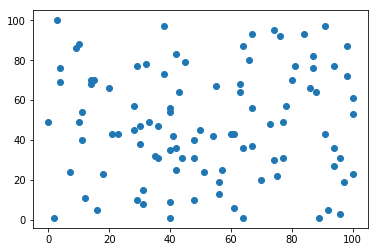

In [178]:
# 画出散点图
plt.scatter(x1, x2)

In [179]:
train_data = [[x1, x2] for x1, x2 in zip(X1, X2)]

In [180]:
train_data

[[100, 39],
 [21, 77],
 [72, 38],
 [20, 42],
 [96, 75],
 [94, 31],
 [20, 32],
 [15, 58],
 [24, 55],
 [48, 40],
 [31, 60],
 [23, 93],
 [36, 23],
 [17, 89],
 [66, 98],
 [26, 22],
 [47, 47],
 [41, 73],
 [46, 45],
 [89, 18],
 [98, 49],
 [7, 1],
 [94, 51],
 [64, 30],
 [13, 50],
 [92, 58],
 [71, 15],
 [44, 19],
 [6, 26],
 [28, 39],
 [57, 29],
 [31, 99],
 [92, 2],
 [90, 33],
 [46, 50],
 [0, 16],
 [17, 35],
 [68, 68],
 [41, 69],
 [2, 84],
 [48, 8],
 [80, 20],
 [35, 59],
 [53, 28],
 [53, 35],
 [83, 68],
 [0, 61],
 [54, 30],
 [16, 74],
 [21, 62],
 [40, 43],
 [7, 9],
 [48, 87],
 [18, 25],
 [81, 2],
 [27, 25],
 [4, 3],
 [30, 81],
 [20, 96],
 [59, 9],
 [97, 22],
 [21, 94],
 [9, 46],
 [76, 64],
 [41, 11],
 [37, 21],
 [71, 90],
 [45, 26],
 [34, 68],
 [22, 30],
 [97, 71],
 [0, 88],
 [83, 100],
 [24, 15],
 [4, 64],
 [54, 45],
 [59, 47],
 [44, 97],
 [57, 12],
 [94, 40],
 [25, 100],
 [52, 22],
 [71, 46],
 [43, 6],
 [54, 19],
 [50, 35],
 [98, 34],
 [27, 40],
 [50, 92],
 [86, 85],
 [24, 55],
 [49, 44],
 [0

In [183]:
cluster = KMeans(n_clusters=6, max_iter=500)

In [184]:
cluster.fit(train_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [185]:
cluster.cluster_centers_

array([[49.07692308, 28.76923077],
       [27.6       , 86.3       ],
       [81.8       , 77.7       ],
       [17.46666667, 53.4       ],
       [88.06666667, 29.33333333],
       [13.21428571, 20.35714286]])

In [186]:
cluster.labels_

array([4, 1, 4, 3, 2, 4, 5, 3, 3, 0, 3, 1, 0, 1, 2, 5, 0, 1, 0, 4, 4, 5,
       4, 0, 3, 2, 4, 0, 5, 3, 0, 1, 4, 4, 0, 5, 5, 2, 1, 1, 0, 4, 3, 0,
       0, 2, 3, 0, 1, 3, 0, 5, 1, 5, 4, 5, 5, 1, 1, 0, 4, 1, 3, 2, 0, 0,
       2, 0, 1, 5, 2, 1, 2, 5, 3, 0, 0, 1, 0, 4, 1, 0, 4, 0, 0, 0, 4, 3,
       1, 2, 3, 0, 3, 1, 5, 3, 0, 1, 5, 1], dtype=int32)

In [187]:
from collections import defaultdict

In [188]:
centers = defaultdict(list)

In [192]:
for label, location in zip(cluster.labels_, train_data):
    centers[label].append(location)
# print(centers)

In [193]:
centers

defaultdict(list,
            {4: [[100, 39],
              [72, 38],
              [94, 31],
              [89, 18],
              [98, 49],
              [94, 51],
              [71, 15],
              [92, 2],
              [90, 33],
              [80, 20],
              [81, 2],
              [97, 22],
              [94, 40],
              [71, 46],
              [98, 34],
              [100, 39],
              [72, 38],
              [94, 31],
              [89, 18],
              [98, 49],
              [94, 51],
              [71, 15],
              [92, 2],
              [90, 33],
              [80, 20],
              [81, 2],
              [97, 22],
              [94, 40],
              [71, 46],
              [98, 34],
              [100, 39],
              [72, 38],
              [94, 31],
              [89, 18],
              [98, 49],
              [94, 51],
              [71, 15],
              [92, 2],
              [90, 33],
              [80, 20],
              [81, 2]

In [194]:
color = ['red', 'green', 'grey', 'black', 'yellow', 'orange']

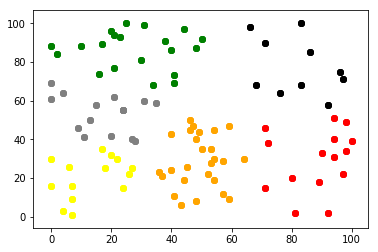

In [195]:
for i, c in enumerate(centers):
    for location in centers[c]:
        plt.scatter(*location, c = color[i]) 

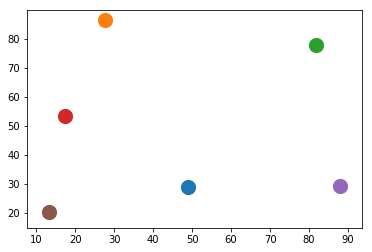

In [198]:
for center in cluster.cluster_centers_:
    plt.scatter(*center, s=200)

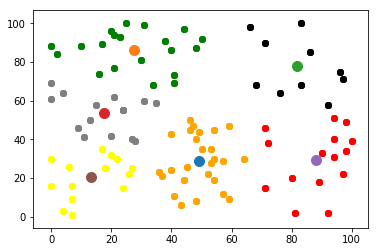

In [197]:
for i, c in enumerate(centers):
    for location in centers[c]:
        plt.scatter(*location, c = color[i]) 
for center in cluster.cluster_centers_:
    plt.scatter(*center, s=100)        

In [202]:
# Kmeans距离计算， 就是求解两点之间的距离
def distance():
    return np.sqrt(x1, x2) ** 2 + (y1 - y2) ** 2

## Part-2 Question and Answer 问答

#### 1. What's the *model*? why  all the models are wrong, but some are useful? (5 points) 

Ans:

<评阅点>
> + 对模型的理解是否正确,对模型的抽象性是否正确(5')

#### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting. (10 points)

Ans:

<评阅点>
> + 对过拟合和欠拟合的理解是否正确 (3')
+ 对欠拟合产生的原因是否理解正确(2')
+ 对过拟合产生的原因是否理解正确(5')

#### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? (12')

Ans:

<评阅点>
> + 对precision, recall, AUC, F1, F2 理解是否正确(6‘)
+ 对precision, recall, AUC, F1, F2的使用侧重点是否理解正确 (6’)

#### 4. Based on our course and yourself mind, what's the machine learning?  (8')

Ans:

<评阅点> 开放式问题，是否能说出来机器学习这种思维方式和传统的分析式编程的区别（8'）

#### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？ (8‘)

<评阅点> 开放式问题，主要看能理解评价指标对机器学习模型的重要性.

## Part-03 Programming Practice 编程练习

1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a **completed** Decision Tree Model. You show finish a `predicate()` function, which accepts three parameters **<gender, income, family_number>**, and outputs the predicated 'bought': 1 or 0.  (20 points)

In [4]:
# you code here

<评阅点>
> + 是否将之前的决策树模型的部分进行合并组装， predicate函数能够顺利运行(8')
+ 是够能够输入未曾见过的X变量，例如gender, income, family_number 分别是： <M, -10, 1>, 模型能够预测出结果 (12')

2. 将上一节课(第二节课)的线性回归问题中的Loss函数改成"绝对值"，并且改变其偏导的求值方式，观察其结果的变化。(19 point)

In [5]:
# you code here

<评阅点>
+ 是否将Loss改成了“绝对值”(3')
+ 是否完成了偏导的重新定义(5')
+ 新的模型Loss是否能够收敛 (11’)